[[130727913.0, 4567371.0, 1142217.0, 802487.0], [130686258.0, 4564481.0, 1215362.0, 801261.0], [130640402.0, 4578467.0, 1206176.0, 806314.0], [130621780.0, 4582666.0, 1174325.0, 802405.0], [130663560.0, 4543506.0, 1165863.0, 798932.0], [130674429.0, 4537279.0, 1177914.0, 800343.0], [130744715.0, 4956396.0, 2138035.0, 811824.0], [130622109.0, 4659269.0, 1174767.0, 803977.0], [130613526.0, 4541381.0, 1147893.0, 801344.0], [130694566.0, 4577724.0, 1180724.0, 799473.0], [0.9999998419404071, 0.999999989821196, 0.9999999695208996, 0.9999999491057029]]
[[  1.30727913e+08   4.56737100e+06   1.14221700e+06   8.02487000e+05]
 [  9.99999836e-01   9.99999990e-01   9.99999969e-01   9.99999949e-01]
 [  1.30744715e+08   4.95639600e+06   2.13803500e+06   8.11824000e+05]
 [  1.30621780e+08   4.58266600e+06   1.17432500e+06   8.02405000e+05]
 [  1.30686258e+08   4.56448100e+06   1.21536200e+06   8.01261000e+05]
 [  1.30622109e+08   4.65926900e+06   1.17476700e+06   8.03977000e+05]
 [  1.30668994e+08   4

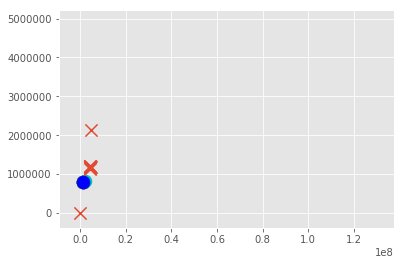

Average number of instructions: 118789932.636
Maximum number of Instructions: 130744715.0
Minimum Number of Instructions: 0.99999984194
Spread(SD) of Instructions: 37564697.1379


Average number of Cache-references: 4191685.54545
Maximum number of Cache-references: 4956396.0
Minimum Number of Cache-references: 0.999999989821
Spread(SD) of Cache-references: 1330438.83339


Average number of Cache-misses: 1156661.54545
Maximum number of Cache-misses: 2138035.0
Minimum Number of Cache-misses: 0.999999969521
Spread(SD) of Cache-misses: 458148.008238


Average number of Branch-misses: 729851.0
Maximum number of Branch-misses: 811824.0
Minimum Number of Branch-misses: 0.999999949106
Spread(SD) of Branch-misses: 230824.822902



Cosine similarity between phase 1 and  2 : 0.9999998419404071

Cosine similarity between phase 2 and  3 : 0.999999989821196

Cosine similarity between phase 3 and  4 : 0.9999999695208996

Cosine similarity between phase 4 and  5 : 0.9999999491057029

Cosine similarity

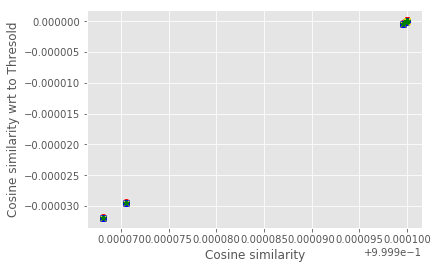

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
test_file = open('output.txt', 'r')
test_lines = test_file.readlines()
l=[]
tot_l=[]
for each_line in test_lines:
    str1=each_line
    removed = str1.replace("]", "") 
    removed = removed.replace("[", "")
    removed = removed.replace(" ", "")
    removed = removed.replace("'", "")
    s=(removed.split(","))
    for i in range(4):
        l.append(float(s[i]))  
    tot_l.append(l)
    l=[]
#print(s)
print(tot_l)
X = np.array(tot_l)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)
colors = ["g.","r.","c.","y.","b.","g.","r.","c.","y.","b."]
#print(len(X))
for i in range(len(X)-1):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1],X[i][2],X[i][3], colors[labels[i]], markersize = 25
            )


plt.scatter(centroids[:, 1],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()
tot_inst=[]
tot_cacheref=[]
tot_cachemiss=[]
tot_brmiss=[]
for i in range(len(X)):
    tot_inst.append(X[i][0])
    tot_cacheref.append(X[i][1])
    tot_cachemiss.append(X[i][2])
    tot_brmiss.append(X[i][3])
#Instructins Analysis
tot_inst=np.array(tot_inst)
print("Average number of instructions:",tot_inst.mean())
print("Maximum number of Instructions:",tot_inst.max())
print("Minimum Number of Instructions:",tot_inst.min())
print("Spread(SD) of Instructions:",tot_inst.std())
print("\n")

#Analysis of Cache_references 
tot_cacheref=np.array(tot_cacheref)
print("Average number of Cache-references:",tot_cacheref.mean())
print("Maximum number of Cache-references:",tot_cacheref.max())
print("Minimum Number of Cache-references:",tot_cacheref.min())
print("Spread(SD) of Cache-references:",tot_cacheref.std())
print("\n")

#Analysis of Cache-misses
tot_cachemiss=np.array(tot_cachemiss)
print("Average number of Cache-misses:",tot_cachemiss.mean())
print("Maximum number of Cache-misses:",tot_cachemiss.max())
print("Minimum Number of Cache-misses:",tot_cachemiss.min())
print("Spread(SD) of Cache-misses:",tot_cachemiss.std())
print("\n")

#Analysis of Branch-misses
tot_brmiss=np.array(tot_brmiss)
print("Average number of Branch-misses:",tot_brmiss.mean())
print("Maximum number of Branch-misses:",tot_brmiss.max())
print("Minimum Number of Branch-misses:",tot_brmiss.min())
print("Spread(SD) of Branch-misses:",tot_brmiss.std())
print("\n")

#cosine
for i in range(len(s)):
    print("\nCosine similarity between phase",i+1,"and ",i+2,":",float(s[i]))

#thresold cosine1
print("\nThresold1:",float(s[0]),"\nCosines wrt to Thresold:")
l=[];l1=[];l2=[];l3=[];l4=[]
for i in range(len(s)):
    cs=float(s[i])-float(s[0])
    print("\nCosine similarity wrt thresold between phase",i+1,"and ",i+2,":",float(cs))
    l.append(cs)
print("\n")
for i in range(len(s)):
    cs=float(s[i])-float(s[1])
    print("\nCosine similarity wrt thresold between phase",i+1,"and ",i+2,":",float(cs))
    l1.append(cs)
print("\n")
for i in range(len(s)):
    cs=float(s[i])-float(s[2])
    print("\nCosine similarity wrt thresold between phase",i+1,"and ",i+2,":",float(cs))
    l2.append(cs)
print("\n")
for i in range(len(s)):
    cs=float(s[i])-float(s[3])
    print("\nCosine similarity wrt thresold between phase",i+1,"and ",i+2,":",float(cs))
    l3.append(cs)
x=[]
for i in range(len(s)):
    x.append(float(s[i]))
x = np.array(x)
y = np.array(l)
y1=np.array(l1)
y2=np.array(l2)
y3=np.array(l3)
print(x,y)
plt.plot(x,y,'go',color='red',linestyle='none')
plt.plot(x,y1,'s',color='blue',linestyle='none')
plt.plot(x,y1,'x',color='yellow',linestyle='none')
plt.plot(x,y1,'*',color='green',linestyle='none')

plt.xlabel("Cosine similarity")
plt.ylabel("Cosine similarity wrt to Thresold")
plt.show()